### Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
from sklearn import cross_validation as cv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

### Load csv

In [2]:
motionloc = 'C:/Users/Valued Customer/Desktop/motion_feature.csv'
nomotionloc = 'C:/Users/Valued Customer/Desktop/nomotion_feature.csv'
motion = pd.read_csv(motionloc, header=None,skip_blank_lines=True) # load whole table, row 22 is NA
nomotion = pd.read_csv(nomotionloc, header=None,skip_blank_lines=True)
motion_data = motion.ix[1:,2:]  # column 2-end are features, row 0 is column name
nomotion_data = nomotion.ix[1:,2:]
motion_class = np.empty(len(motion)-1) 
motion_class [:] = 1 #
#motion.ix[1:,7] # column 7 is class
nomotion_class = np.empty(len(nomotion)-1) 
nomotion_class [:] = 0 
#nomotion.ix[1:,7]
x=motion_data[36:].append(nomotion_data[51:],ignore_index = True)
x=x.astype('float64') # convert string to float
y=pd.concat([pd.DataFrame(motion_class[36:]),pd.DataFrame(nomotion_class[51:])],ignore_index = True)
for i in range(len(y)):
    y.ix[i]=y.ix[i].astype('category') # convert string to categorical

### Exploratory analysis

In [3]:
# data_all=x
# data_all['class']=y

In [4]:
# _=data_all.boxplot(by='class')

In [5]:
# _=data_all.groupby('class').boxplot() 

In [6]:
# _=scatter_matrix(x, alpha=0.2, figsize=(6, 6))#, diagonal='kde')

In [7]:
# _=data_all.hist()

### Split training and testing

In [3]:
x_train, x_test, y_train, y_test=cv.train_test_split(x,y,test_size=0.1)

### Data preprocessing

In [18]:
x_train_scaled = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
x_test_scaled= scaler.transform(x_test)

In [5]:
data_scaled=pd.DataFrame(x_train_scaled)
data_scaled['class']=y_train

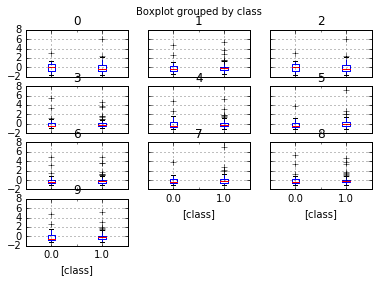

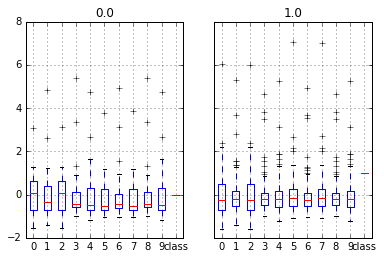

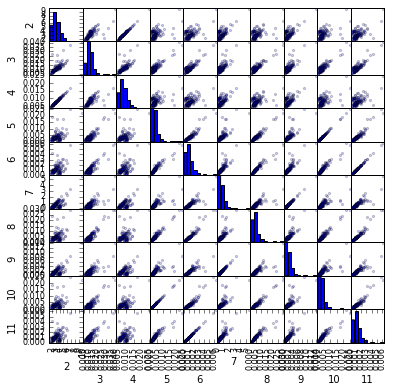

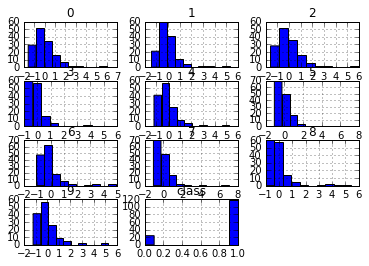

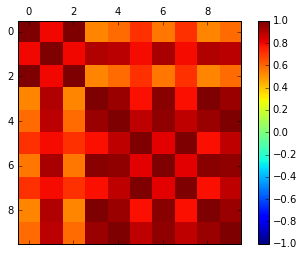

In [25]:
data_all=pd.DataFrame(x_train_scaled).append(pd.DataFrame(x_test_scaled))
x_scaled=pd.DataFrame(x_train_scaled).append(pd.DataFrame(x_test_scaled))
data_all['class']=y
_=data_all.boxplot(by='class')
_=data_all.groupby('class').boxplot() 
_=scatter_matrix(x, alpha=0.2, figsize=(6, 6))#, diagonal='kde')
_=data_all.hist()

correlations = x_scaled.corr()
# plot correlation matrix
# machine learning mastery with python Chap 6.
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
_=plt.show()

### Build classifier

In [22]:
names=['LDA','QDA','logistic regression','random forest','SVC','KNN']
classifiers=[LinearDiscriminantAnalysis(),
             QuadraticDiscriminantAnalysis(),
             LogisticRegression(),
             RandomForestClassifier(max_depth=5, n_estimators=3, max_features=1),
             SVC(gamma=2, C=1),
             KNeighborsClassifier(3)]
for name, clf in zip(names,classifiers):
    #clf.fit(x_train_scaled,y_train)
    #print(clf.score(x_test_scaled,y_test))
    score = cross_validation.cross_val_score(clf, x_train_scaled, y_train[0], cv=5)#,scoring=scoring)
    print'{}: accuracy {}+/-{}'.format(name,score.mean(),score.std())

LDA: accuracy 0.755384615385+/-0.0476873446549
QDA: accuracy 0.724923076923+/-0.0469308946829
logistic regression: accuracy 0.826769230769+/-0.0190073171834
random forest: accuracy 0.786769230769+/-0.0615046060718
SVC: accuracy 0.803076923077+/-0.0562664834494
KNN: accuracy 0.731384615385+/-0.0869283864954


### Build Classifier with first 5 of the features

In [23]:
for name, clf in zip(names,classifiers):
    #clf.fit(x_train_scaled,y_train)
    #print(clf.score(x_test_scaled,y_test))
    score = cross_validation.cross_val_score(clf, x_train_scaled[:,0:5], y_train[0], cv=5)#,scoring=scoring)
    print'{}: accuracy {}+/-{}'.format(name,score.mean(),score.std())

LDA: accuracy 0.755076923077+/-0.0554734330572
QDA: accuracy 0.654461538462+/-0.0863601924514
logistic regression: accuracy 0.811076923077+/-0.0148650736359
random forest: accuracy 0.795076923077+/-0.0399928987779
SVC: accuracy 0.802769230769+/-0.0575343478579
KNN: accuracy 0.724307692308+/-0.050870760949


### Lasso

In [8]:
lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 10)
scores=[]
scores_std=[]
for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, x_train_scaled, y_train[0], n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

C:\Users\Valued Customer\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [9]:
scores

[-0.0015378781245025674,
 0.0056222626583856128,
 0.011166826027568836,
 0.015071360725092339,
 0.015522698211675628,
 0.011772470452891573,
 0.0032662492333969486,
 0.019556201371542608,
 -0.016613329632549023,
 -0.035228554186578664]

### Ridge

In [10]:
n_alphas = 10
alphas = np.logspace(-10, -1, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)
scores =[]
for a in alphas:
    clf.set_params(alpha=a)
    this_scores = cross_validation.cross_val_score(clf, x_train_scaled, y_train[0], cv=3)#,scoring=scoring)
    scores.append(np.mean(this_scores))

In [11]:
scores

[-2.9815921612953917,
 -2.981592158416881,
 -2.9815921296318937,
 -2.9815918417890899,
 -2.9815889640810358,
 -2.9815602588357155,
 -2.981280207968664,
 -2.9790355010668352,
 -2.9720237338446416,
 -2.9599084324020493]